<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Proyectos

Proyectos propuestos para Python Analytics<br>
v1.5

### Formato de entrega
Toda la etapa de entrenamiento del proyecto se debe realizar en un colab o nootebook que luego el alumno subierá a su repositorio de proyecto para que el profesor pueda evaluar los avances.<br>

__APROBACIÓN:__ El proyecto será aprobado cuando el modelo entrenado alcance la exactitud/condición planteada en el proyecto.<br>

### Predicción de enfermedades cardíacas
<img src="https://github.com/InoveAlumnos/proyecto_analytics_python/raw/main/heart.png" width="300" align="center">

- El objetivo es armar un clasificador binario que permita predecir si un paciente podría presentar o no enfermedades cardíacas.
- Deberá entrenar un modelo clasificador y varios algoritmos para clasificación. Por ejemplo, en el caso de seleccionar un RandomForest debe entrenar con distinto número de estimadores (distantas cantidad de árboles), pero a su vez entrenar distintos KNN o regresión logística, etc. Deberá compararlos utilizando la métrica adecuada y elegir el mejor modelo.
- Entre el dataset encontrará datos categóricos que requieren ser codificados, y datos numéricos para normalizar.
- A modo de análisis, debe identificar si el dataset se encuentra correctamente balanceado (entre pacientes con y sin enfermedad cardíaca), y como está balanceado el dataset en cuanto a género y edad (este análisis es unicamente a modo informativo).

#### Objetivo

El accuracy del modelo definitivo debe superar el 80% (0.8)

#### Como descargar el dataset

In [198]:
# Ejecutar:
import os
import platform

if os.access('heart.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/heart.csv > heart.csv
    else:
        !wget heart.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/heart.csv

In [199]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

In [200]:
df = pd.read_csv('heart.csv')

In [201]:
print("👀 Primeras filas:")
print(df.head())

👀 Primeras filas:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [202]:
print("\nInfo del df:")
df.info()


Info del df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [203]:
print("\nDescribe numérico:")
print(df.describe())


Describe numérico:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std    

In [204]:
print("\nShape (filas, columnas) ➜", df.shape)


Shape (filas, columnas) ➜ (303, 14)


In [205]:
print("\nNaNs por columna:")
print(df.isna().sum())


NaNs por columna:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [206]:
df2 = df.copy()
df2.loc[[0, 2], "age"] = np.nan
df2 = df2.dropna(subset=["age"])
df2.reset_index(inplace=True)
df2.head()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,37.0,1,2,130,250,0,1,187,0,3.5,0,0,2,1
1,3,56.0,1,1,120,236,0,1,178,0,0.8,2,0,2,1
2,4,57.0,0,0,120,354,0,1,163,1,0.6,2,0,2,1
3,5,57.0,1,0,140,192,0,1,148,0,0.4,1,0,1,1
4,6,56.0,0,1,140,294,0,0,153,0,1.3,1,0,2,1


In [207]:
df3 = df.copy()
df3["age"].fillna(0, inplace=True)
df3.head()

/tmp/ipython-input-207-1844624288.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3["age"].fillna(0, inplace=True)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [208]:
df4 = df.copy()
df4["age"].fillna(df4["age"].mean(), inplace=True)
df4.head()

/tmp/ipython-input-208-2208843671.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df4["age"].fillna(df4["age"].mean(), inplace=True)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [209]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
label_encoding = le.fit_transform(df['thal'])
df['thal_LE'] = label_encoding
print("Clases de thal:", le.classes_)

Clases de thal: [0 1 2 3]


In [210]:
try:
    onehot_encoder = OneHotEncoder(sparse_output=False)
except TypeError:
    onehot_encoder = OneHotEncoder(sparse=False)


one_hot = onehot_encoder.fit_transform(label_encoding.reshape(-1, 1))
ohe_cols = [f'thal_{c}' for c in le.classes_]
one_hot_df = pd.DataFrame(one_hot, columns=ohe_cols, dtype=int)

In [211]:
df = df.join(one_hot_df)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,thal_LE,thal_0,thal_1,thal_2,thal_3
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,2,0,0,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,2,0,0,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,2,0,0,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,2,0,0,1,0


In [212]:
df.drop(columns=['thal', 'thal_LE'], inplace=True, errors='ignore')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target,thal_0,thal_1,thal_2,thal_3
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,1,0,0,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,1,0,0,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,1,0,0,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,1,0,0,1,0


In [213]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
robust_scaler = RobustScaler()

In [214]:
_ = std_scaler.fit_transform(df.select_dtypes(float))
_ = minmax_scaler.fit_transform(df.select_dtypes(float))
_ = robust_scaler.fit_transform(df.select_dtypes(float))

In [215]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [216]:
df.replace('?', np.nan, inplace=True)
df = df.apply(pd.to_numeric, errors='ignore')

In [217]:
X, y = df.drop('target', axis=1), df['target']

In [218]:
cat = ['cp', 'restecg', 'slope', 'thal', 'ca']
num = [c for c in X.columns if c not in cat]

In [219]:
cat = ['cp', 'restecg', 'slope', 'ca']
num = [c for c in X.columns if c not in cat]

prep = ColumnTransformer([
    ('num', Pipeline([('imp', SimpleImputer(strategy='median')),
                      ('sc',  StandardScaler())]),      num),
    ('cat', Pipeline([('imp', SimpleImputer(strategy='most_frequent')),
                      ('oh',  OneHotEncoder(handle_unknown='ignore'))]), cat)
])

In [220]:
X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=.2, random_state=42, stratify=y)

In [221]:
grid_cfg = {
    'RF': (RandomForestClassifier(random_state=42),
           {'clf__n_estimators': [200, 400],
            'clf__max_depth':   [None, 8]}),

    'KNN': (KNeighborsClassifier(),
            {'clf__n_neighbors': [5, 11],
             'clf__weights':     ['distance']}),

    'LOG': (LogisticRegression(max_iter=1000, solver='liblinear'),
            {'clf__C': [0.1, 1, 10]})
}

best_acc, best_pipe = 0, None

In [222]:
for name, (est, params) in grid_cfg.items():
    pipe = Pipeline([('prep', prep), ('clf', est)])
    gscv = GridSearchCV(pipe, params, cv=5, scoring='accuracy', n_jobs=-1)
    gscv.fit(X_tr, y_tr)

    y_pred = gscv.best_estimator_.predict(X_te)
    acc    = accuracy_score(y_te, y_pred)
    print(f'{name:3}  |  val_acc={gscv.best_score_:.3f}  test_acc={acc:.3f}')

    if acc > best_acc:
        best_acc, best_pipe = acc, gscv.best_estimator_

print(f'\nMEJOR MODELO: {best_pipe.named_steps["clf"].__class__.__name__}  '
      f'→ accuracy test = {best_acc:.3f}')
assert best_acc >= 0.80, "⬆️  Ajustar hiperparámetros hasta superar 0.80"


RF   |  val_acc=0.835  test_acc=0.787
KNN  |  val_acc=0.822  test_acc=0.754
LOG  |  val_acc=0.847  test_acc=0.852

MEJOR MODELO: LogisticRegression  → accuracy test = 0.852


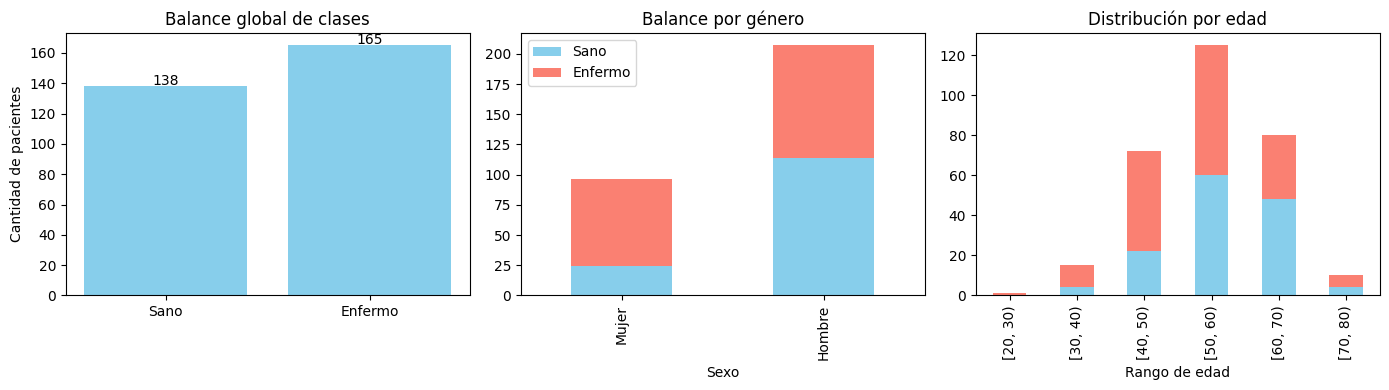

In [223]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))


class_counts = y.value_counts().sort_index()
axes[0].bar(['Sano', 'Enfermo'], class_counts.values, color='skyblue')
axes[0].set_title('Balance global de clases')
axes[0].set_ylabel('Cantidad de pacientes')
for i, v in enumerate(class_counts.values):
    axes[0].text(i, v + 1, v, ha='center')

sex_map = {0: 'Mujer', 1: 'Hombre'}
ct = pd.crosstab(df['sex'], df['target'])
ct.index = ct.index.map(sex_map)
ct.plot(kind='bar', stacked=True, ax=axes[1], color=['skyblue', 'salmon'])
axes[1].set_title('Balance por género')
axes[1].set_xlabel('Sexo'); axes[1].legend(['Sano', 'Enfermo'])

bins = [20, 30, 40, 50, 60, 70, 80]
df['age_bin'] = pd.cut(df['age'], bins=bins, right=False)
age_ct = pd.crosstab(df['age_bin'], df['target'])
age_ct.plot(kind='bar', stacked=True, ax=axes[2], color=['skyblue', 'salmon'])
axes[2].set_title('Distribución por edad')
axes[2].set_xlabel('Rango de edad')
axes[2].legend().remove()

plt.tight_layout()
plt.show()

df.drop(columns='age_bin', inplace=True, errors='ignore')

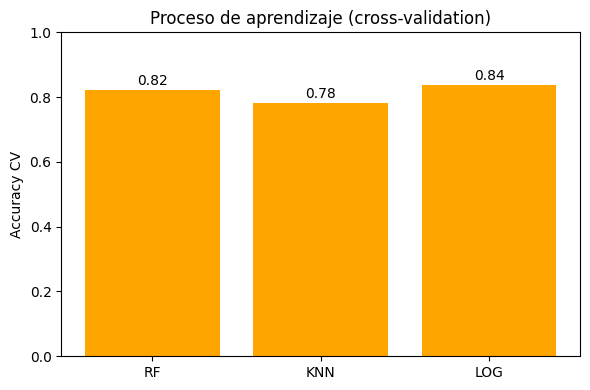

In [224]:
cv_scores = {n: cross_val_score(Pipeline([('prep', prep), ('clf', e)]), X, y,
                                cv=5, scoring='accuracy').mean()
             for n, (e, _) in grid_cfg.items()}

plt.figure(figsize=(6, 4))
plt.bar(cv_scores.keys(), cv_scores.values(), color='orange')
plt.ylim(0, 1); plt.ylabel('Accuracy CV')
plt.title('Proceso de aprendizaje (cross-validation)')
for i, v in enumerate(cv_scores.values()):
    plt.text(i, v + 0.015, f'{v:.2f}', ha='center')
plt.tight_layout(); plt.show()

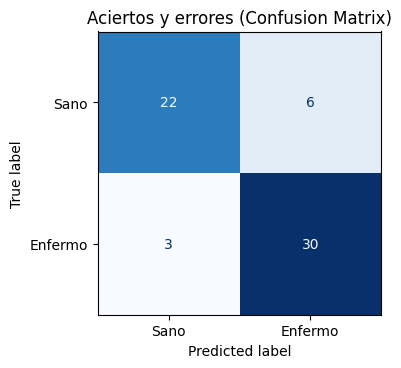

In [225]:
y_pred = best_pipe.predict(X_te)
cm = confusion_matrix(y_te, y_pred, labels=[0, 1])
fig, ax = plt.subplots(figsize=(4, 4))
ConfusionMatrixDisplay(cm, display_labels=['Sano', 'Enfermo'])\
    .plot(ax=ax, cmap='Blues', colorbar=False)
plt.title('Aciertos y errores (Confusion Matrix)')
plt.tight_layout(); plt.show()

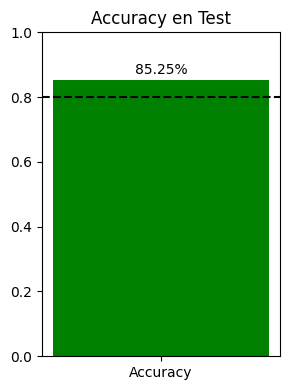

In [226]:
plt.figure(figsize=(3, 4))
plt.bar(['Accuracy'], [best_acc], color='green' if best_acc >= 0.8 else 'red')
plt.axhline(0.8, color='black', linestyle='--')
plt.ylim(0, 1); plt.title('Accuracy en Test')
plt.text(0, best_acc + 0.02, f'{best_acc:.2%}', ha='center')
plt.tight_layout(); plt.show()